# Feature Importance with Ensembles

In [13]:
# Imports
from sklearn.datasets import load_digits
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Step 0 -- Data Exploration & Preprocessing

We will use three datasets throughout this tutorial:

1. **Palmer Penguins** – Tabular classification
2. **Student Performance** – Tabular multi-target regression
3. **Digits** – Image classification

Let's explore each of them to understand their structure, features, and targets.

#### Penguins: Tabular classification

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Adelie_Penguins_on_iceberg.jpg/960px-Adelie_Penguins_on_iceberg.jpg?20100310210706" width="500">

In [14]:
# Penguin dataset
data_penguins = sns.load_dataset("penguins").dropna()

# split into features (X) and target (y)
X_penguins = data_penguins.drop(columns="species")
y_penguins = data_penguins["species"]

In [15]:
# Features
print("Shape:", X_penguins.shape)
X_penguins.head()

Shape: (333, 6)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [16]:
# Target
print("Shape:", y_penguins.shape)
y_penguins.head()

Shape: (333,)


0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

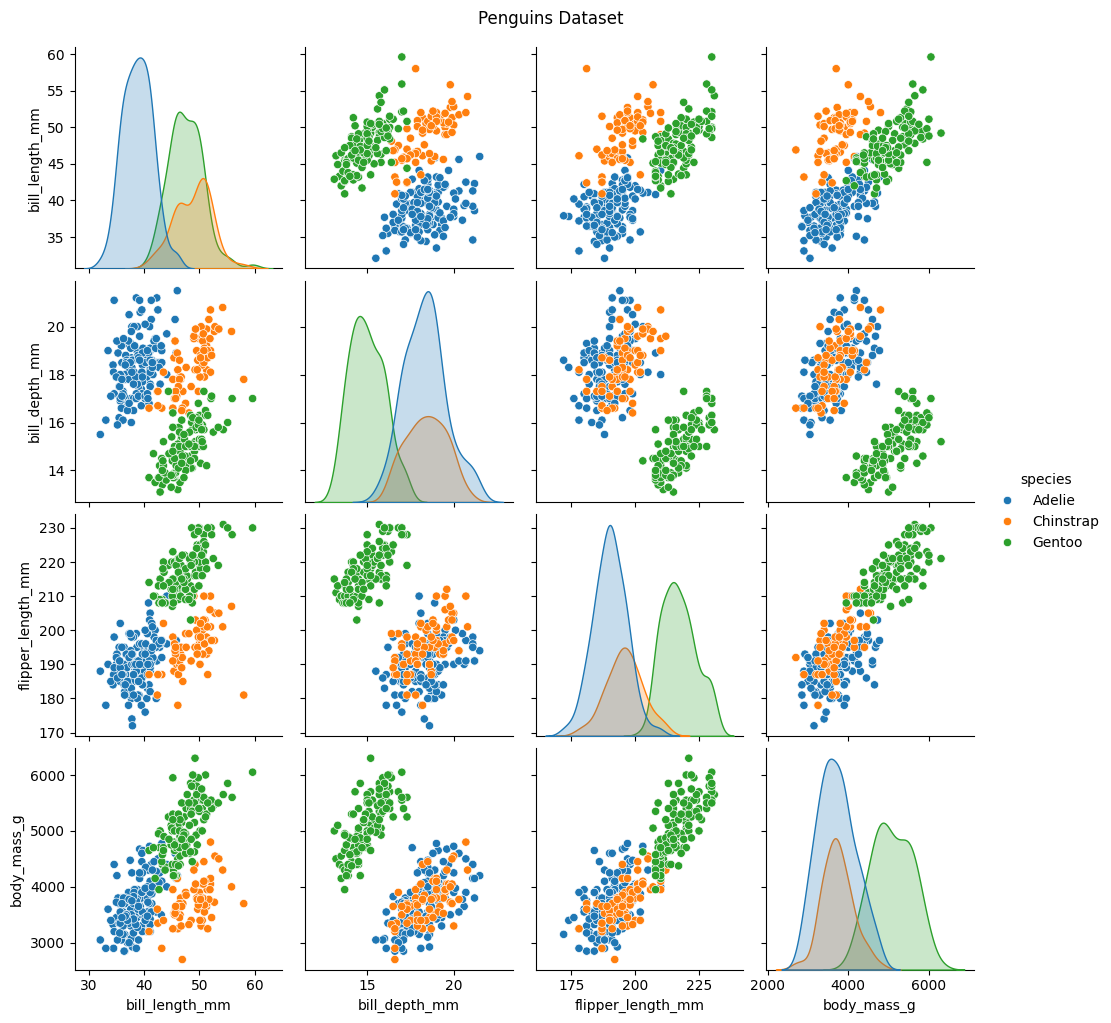

In [17]:
# Pairplot by species
sns.pairplot(data_penguins, hue="species")
plt.suptitle("Penguins Dataset", y=1.02)
plt.show()

In [18]:
# Preprocessing

# One-hot encode categorical features
X_penguins = pd.get_dummies(X_penguins)

<div style="border: 1px solid rgb(0, 0, 0); background-color:rgb(224, 179, 83); padding: 10px; border-radius: 5px; color: white;">
<b>❓ Question:</b> How did one-hot encoding change the data?
</div>

In [10]:
# your code
...

#### Student Performance: Tabular multi-target regression

In [19]:
# Student performance dataset
data_students = fetch_ucirepo(id=320) 

# split into features and target
X_students = data_students.data.features 
Y_students = data_students.data.targets 

In [20]:
# Features
print("Shape:", X_students.shape)
X_students.head()

Shape: (649, 30)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [21]:
# Targets
print("Shape:", Y_students.shape)
Y_students.head()

Shape: (649, 3)


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [22]:
# Check the grade range
Y_students.describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


In [14]:
# Preprocessing

# Encode categorical features
X_students = pd.get_dummies(X_students)

#### Digits: Image classification

In [9]:
# Digits dataset
data_digits = load_digits()

# split into features and target
X_digits = data_digits.data
y_digits = data_digits.target

In [10]:
print("Shape:", X_digits.shape)
print("Target classes:", np.unique(y_digits))

Shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]


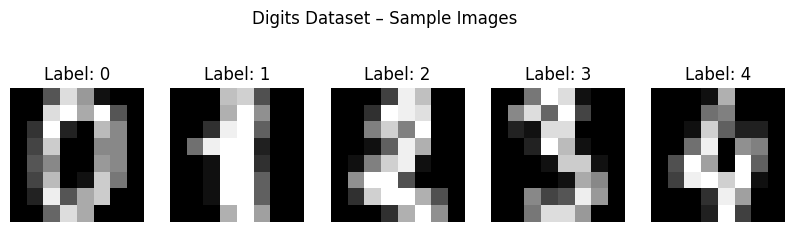

In [11]:
# Show first few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(data_digits.images[i], cmap="gray")
    ax.set_title(f"Label: {y_digits[i]}")
    ax.axis("off")
plt.suptitle("Digits Dataset – Sample Images")
plt.show()